In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from hmmlearn import hmm

In [31]:
states = ["happy", "sad"]
n_states = len(states)
print('Number of hidden states :',n_states) 

Number of hidden states : 2


In [32]:
observations = ['red','green','blue'] 
n_observations = len(observations) 
print('Number of observations  :',n_observations)

Number of observations  : 3


In [33]:

# Define the initial state distribution 
state_probability = np.array([0.4, 0.6]) 
print("State probability: ", state_probability) 
  
# Define the state transition probabilities 
transition_probability = np.array([[0.7, 0.3], [0.5, 0.5]]) 
print("\nTransition probability:\n", transition_probability) 

# Define the observation likelihoods 
emission_probability= np.array([[0.8, 0.1, 0.1], [0.2, 0.3, 0.5]]) 
print("\nEmission probability:\n", emission_probability)

State probability:  [0.4 0.6]

Transition probability:
 [[0.7 0.3]
 [0.5 0.5]]

Emission probability:
 [[0.8 0.1 0.1]
 [0.2 0.3 0.5]]


In [34]:
model = hmm.CategoricalHMM(n_components=n_states) 
model.startprob_ = state_probability 
model.transmat_ = transition_probability 
model.emissionprob_ = emission_probability

In [35]:

# Define the sequence of observations 
observations_sequence = np.array([1, 2, 0]).reshape(-1, 1) 
observations_sequence

array([[1],
       [2],
       [0]])

In [36]:
# Predict the most likely sequence of hidden states 
hidden_states = model.predict(observations_sequence) 
print("Most likely hidden states:", hidden_states)

Most likely hidden states: [1 1 0]


In [37]:

log_probability, hidden_states = model.decode(observations_sequence, lengths = len(observations_sequence), algorithm ='viterbi' ) 
  
print('Log Probability :',log_probability) 
print("Most likely hidden states:", hidden_states)

Log Probability : -4.017383521085973
Most likely hidden states: [1 1 0]


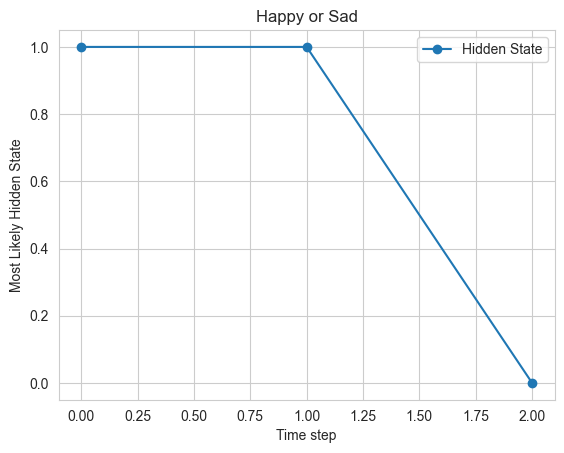

In [38]:

# Plot the results 
sns.set_style("whitegrid") 
plt.plot(hidden_states, '-o', label="Hidden State") 
plt.xlabel('Time step') 
plt.ylabel('Most Likely Hidden State') 
plt.title("Happy or Sad") 
plt.legend() 
plt.show()